#GRIP : The Spark Foundation ( Data Science and Business Analytics Intern )

#Author :Nithish Kumar S

Task 2: Prediction using Unsupervised ML
(Level - Beginner)
● From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
● Use R or Python or perform this task

● Dataset : https://bit.ly/3kXTdox

Unsupervised learning can be thought as self learning ,where you do not need to supervised the model, where model have to work on its own to discover information.Unsupervised learning mainly deals with unlabelled data.
k-means is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed apriori.
The main idea is to define k centers, one for each cluster. These centers should be placed in a cunning way because of different location causes different result. So, the better choice is to place them as much as possible far away from each other. The next step is to take each point belonging to a given data set and associate it to the nearest center. When no point is pending, the first step is completed and an early group age is done. At this point we need to re-calculate k new centroids as barycenter of theclusters resulting from the previous step. After we have these k new centroids, a new binding has to be done between the same data set points and the nearest new center. A loop has been generated. As a result of this loop we may notice that the k centers change their location step by step until no more changes are done or in other words centers do not move any more.
To identify different species (setosa, versicolor, verginica) of Iris flowers given just 4 features: their sepal and petal lengths and widths. There are 50 observation for each species, total-150.No null value.

# Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

sepal length in cm

sepal width in cm

petal length in cm

petal width in cm

class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Iris (1).csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(columns = ['Id'])

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Graphs Histogram

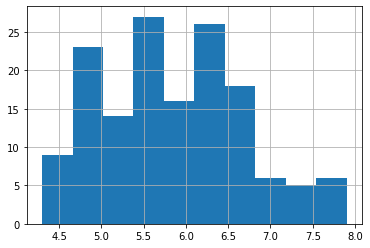

In [9]:
df['SepalLengthCm'].hist()

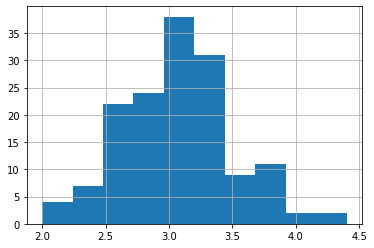

In [10]:
df['SepalWidthCm'].hist()

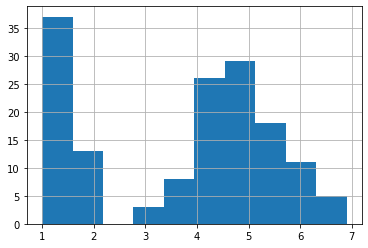

In [11]:
df['PetalLengthCm'].hist()

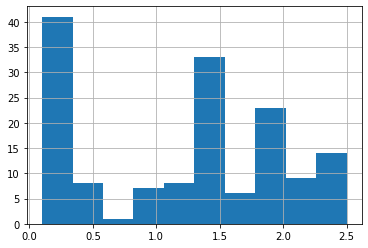

In [12]:
df['PetalWidthCm'].hist()

# Graph Scatter Plot

In [13]:
import warnings
warnings.simplefilter("ignore")

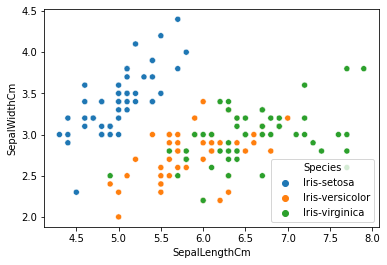

In [14]:
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=(df['Species']))


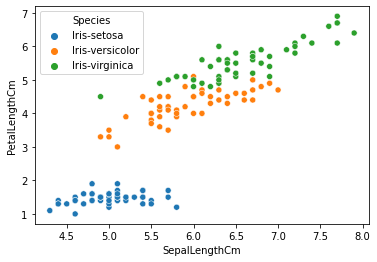

In [15]:
sns.scatterplot(df['SepalLengthCm'],df['PetalLengthCm'],hue=(df['Species']))

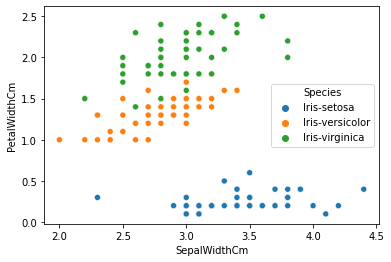

In [16]:
sns.scatterplot(df['SepalWidthCm'],df['PetalWidthCm'],hue=(df['Species']))

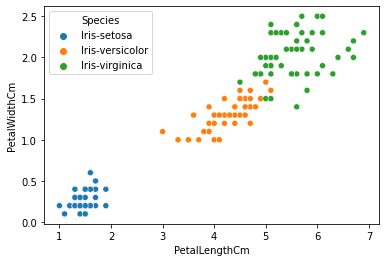

In [17]:
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'],hue=(df['Species']))

# Correlation Using seaborn

In [18]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


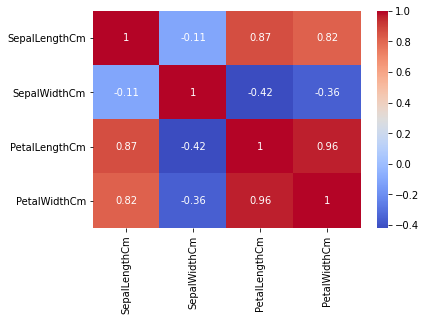

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Splitting The Data 

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
df['Species']=le.fit_transform(df['Species'])

In [23]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Model Training

In [28]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20)

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
print("Accuracy: ",model.score(xtest, ytest) * 100)

Accuracy:  96.66666666666667
